In [1]:
import os 
import pandas as pd 

folder_path = "/home/clarion-isige/Documents/Machine_Learning/year_4_project/NIR_LAB_DATA/kales"

# Get a list of files in the folder
files = os.listdir(folder_path)

files
    

['raw_data']

In [2]:
import os 

folder_path = "/home/clarion-isige/Documents/Machine_Learning/year_4_project/NIR_LAB_DATA/kales"

# Get a list of files in the folder
files = os.listdir(folder_path)

# Iterate over the files
for file in files:
    # Check if the file is a CSV file
    if file.endswith(".csv"):
        # Extract the concentration name from the filename
        concentration = os.path.splitext(file)[0]
        concentration_float = float(concentration)  # Convert concentration to float

        if concentration_float == 0.0099: 
            print("Concentration:", concentration, "mrl" )
            
        elif concentration_float < 0.0099: 
            print("Concentraion: ", concentration, "below_mrl")
        else: 
            print("Concentration", concentration, "above_mrl")
                
        

In [3]:
import os
import pandas as pd 
import glob

def process_csv_files(folder_path):
  """
  Process CSV files in the specified folder.

  Args:
    - folder_path (str): The path to the folder containing CSV files.
  """
  # Use glob to find all CSV files
  pattern = os.path.join(folder_path, '*.csv')
  csv_files = glob.glob(pattern)


  # Initialize an empty list for DataFrames
  dataframes = []
  
  below_mrl = 0 
  above_mrl = 0 
  mrl = 0
  
  for filename in csv_files:
    try:
      # Read the CSV file
      df = pd.read_csv(filename)

      # Drop duplicate columns
      df_cleaned = df.T.drop_duplicates().T

      # Extract concentration name from filename
      concentration = os.path.splitext(os.path.basename(filename))[0]
      concentration_float = float(concentration)

      # Assign concentration name based on value
      concentration_name = None
      if concentration_float == 0.0099:
          concentration_name = 'mrl'
          mrl += 1 
      elif concentration_float < 0.0099:
          concentration_name = 'below'
          below_mrl += 1 
      else:
          concentration_name = 'above'
          above_mrl +=1 

      # Get columns
      other_columns = df_cleaned.columns[1:]
      main_columns = df_cleaned.columns[0]

      # Rename columns
      for i in other_columns:
          df_cleaned.rename(columns={str(main_columns):"Wavelengths", str(i): concentration_name }, inplace=True)

      # Append DataFrame to list
      if isinstance(df_cleaned, pd.DataFrame):
        dataframes.append(df_cleaned)
      else:
        print(f"File {filename} did not produce a DataFrame.")
    except Exception as e:
      print(f"Failed to read {filename} due to {e}")

  # Check if dataframes list is not empty before concatenating
  if dataframes:
    combined_df = pd.concat(dataframes, axis=1)
    final_df = combined_df.T.drop_duplicates().T  # Optional: Remove duplicates again after concatenation
    # Specify the output path
    combined_output_path = os.path.join(folder_path, "combined_kales_data.csv")
    # Save the combined CSV
    final_df.to_csv(combined_output_path, index=False)
    print(f"Combined data saved to: {combined_output_path}")
  else:
    print("No dataframes to concatenate.")
    
  print("Below MRL: ", below_mrl)
  print("Above MRL: ", above_mrl)
  print("MRl: ", mrl)

# Example usage
folder_path = "/home/clarion-isige/Documents/Machine_Learning/year_4_project/NIR_LAB_DATA/kales/raw_data"
process_csv_files(folder_path)


Failed to read /home/clarion-isige/Documents/Machine_Learning/year_4_project/NIR_LAB_DATA/kales/raw_data/combined_kales_data.csv due to could not convert string to float: 'combined_kales_data'
Combined data saved to: /home/clarion-isige/Documents/Machine_Learning/year_4_project/NIR_LAB_DATA/kales/raw_data/combined_kales_data.csv
Below MRL:  5
Above MRL:  20
MRl:  1


In [4]:
import pandas as pd 

path = "/home/clarion-isige/Documents/Machine_Learning/year_4_project/NIR_LAB_DATA/kales/raw_data/combined_kales_data.csv"

df = pd.read_csv(path)

df.head()

,Wavelengths,above,above.1,above.2,above.3,above.4,above.5,above.6,above.7,above.8,...,above.808,above.809,above.810,above.811,above.812,above.813,above.814,above.815,above.816,above.817
0,900.754,71.55,71.75,74.82,74.39,75.69,71.90,69.48,73.02,75.30,...,74.96,76.03,74.11,77.49,73.81,72.97,73.13,73.33,72.88,75.52
1,903.918,71.64,70.80,72.52,73.90,74.47,71.50,68.96,72.25,75.79,...,76.03,77.61,75.10,77.29,74.81,76.07,75.02,75.52,73.83,76.03
2,907.082,67.36,67.52,68.11,66.00,66.78,64.95,63.21,66.50,67.79,...,74.73,75.01,74.61,76.95,75.02,75.05,75.63,75.85,73.93,77.01
3,910.247,68.99,69.19,68.74,71.13,71.99,69.06,67.90,69.21,70.66,...,74.90,74.17,74.93,76.69,74.33,75.09,75.19,75.34,72.84,75.33
4,913.412,70.98,70.84,70.40,71.73,71.36,69.16,68.11,70.11,70.93,...,75.95,74.78,75.29,77.96,76.80,76.66,75.87,76.81,74.81,77.30


In [5]:
combined = "/home/clarion-isige/Documents/Machine_Learning/year_4_project/NIR_LAB_DATA/kales/raw_data/combined_kales_data.csv"
control  = "control.csv"

df_combined = pd.read_csv(combined)
df_control = pd.read_csv(control)



# Combine the DataFrames (vertically)
combined_df = pd.concat([df_combined, df_control], axis=1)  # Optional: ignore_index resets row numbering

all_data = combined_df.T.drop_duplicates().T  
# Save the combined DataFrame to a new CSV file
all_data.to_csv("kale.csv", index=False)

In [6]:
import pandas as pd 

data = "kale.csv"

df = pd.read_csv(data)

df.head()

,Wavelengths,above,above.1,above.2,above.3,above.4,above.5,above.6,above.7,above.8,...,ctrl.14,ctrl.15,ctrl.16,ctrl.17,ctrl.18,ctrl.19,ctrl.20,ctrl.21,ctrl.22,ctrl.23
0,900.754,71.55,71.75,74.82,74.39,75.69,71.90,69.48,73.02,75.30,...,95.87,94.65,95.80,98.77,99.17,96.61,95.11,93.47,90.34,95.40
1,903.918,71.64,70.80,72.52,73.90,74.47,71.50,68.96,72.25,75.79,...,95.52,95.15,98.17,100.76,100.06,97.34,96.97,95.81,92.15,98.56
2,907.082,67.36,67.52,68.11,66.00,66.78,64.95,63.21,66.50,67.79,...,94.76,91.86,97.04,99.75,97.82,95.23,94.20,94.31,91.45,94.56
3,910.247,68.99,69.19,68.74,71.13,71.99,69.06,67.90,69.21,70.66,...,95.00,91.11,97.76,99.45,99.06,96.86,95.12,95.21,93.12,96.23
4,913.412,70.98,70.84,70.40,71.73,71.36,69.16,68.11,70.11,70.93,...,96.46,91.39,97.60,99.01,98.73,96.94,95.75,95.46,94.76,97.52


In [7]:
df_transposed = df.T

df_transposed.head()

df_transposed.to_csv("kale_transposed.csv")


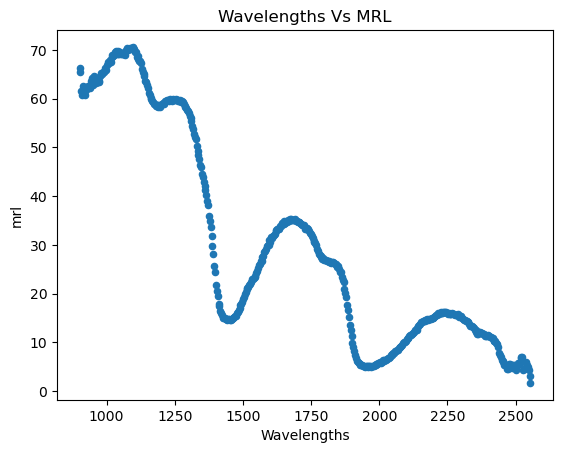

In [8]:
df.plot(kind='scatter', x='Wavelengths', y= 'mrl', title= 'Wavelengths Vs MRL');

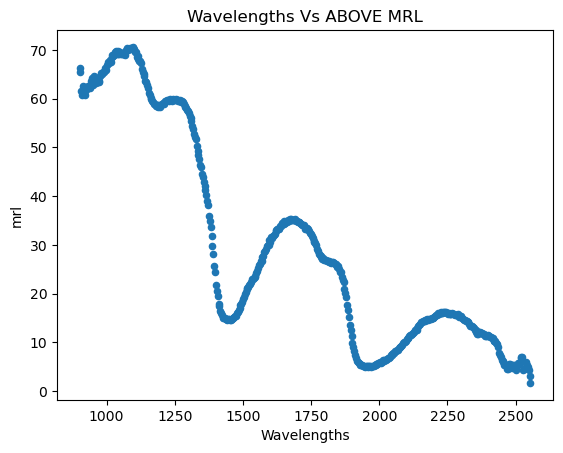

In [9]:
df.plot(kind='scatter', x='Wavelengths', y= 'mrl', title= 'Wavelengths Vs ABOVE MRL');


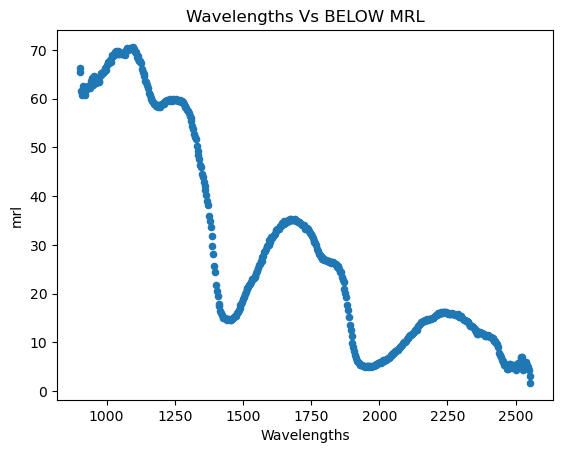

In [10]:
df.plot(kind='scatter', x='Wavelengths', y= 'mrl', title= 'Wavelengths Vs BELOW MRL');


In [11]:
df.columns[0]

'Wavelengths'

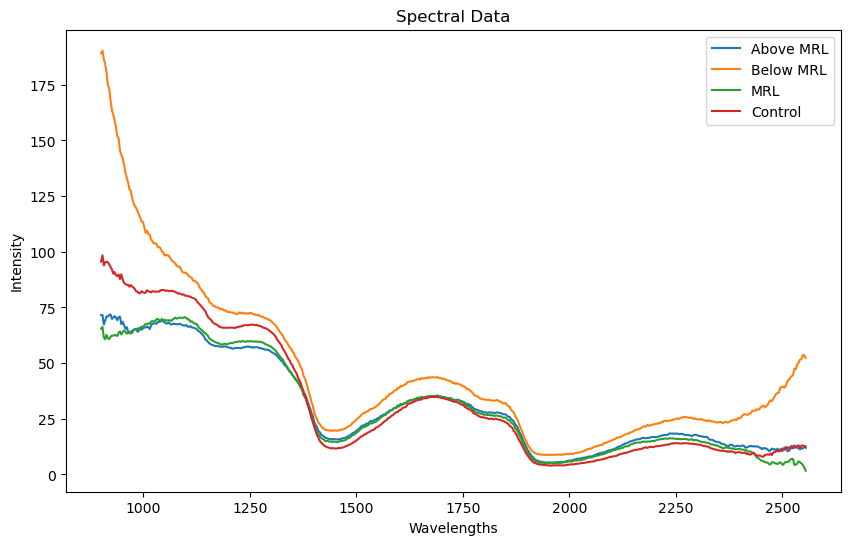

In [12]:
import matplotlib.pyplot as plt 

# Extract wavelengths and categories data
wavelengths = df['Wavelengths']
above_mrl = df['above']
below_mrl = df['below']
mrl = df['mrl']
ctrl = df['ctrl']

# Plot the data
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(wavelengths, above_mrl, label='Above MRL')
plt.plot(wavelengths, below_mrl, label='Below MRL')
plt.plot(wavelengths, mrl, label='MRL')
plt.plot(wavelengths, ctrl, label="Control")

# Add labels and title
plt.xlabel('Wavelengths')
plt.ylabel('Intensity')
plt.title('Spectral Data')

# Add legend
plt.legend()

# Show plot
plt.show()

In [13]:
df_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
Wavelengths,900.754,903.918,907.082,910.247,913.412,916.577,919.743,922.908,926.075,929.241,...,2524.907,2528.214,2531.521,2534.828,2538.136,2541.444,2544.753,2548.061,2551.37,2554.679
above,71.550,71.640,67.360,68.990,70.980,70.910,71.700,71.840,69.870,70.440,...,12.270,13.070,11.970,12.130,11.680,11.240,11.800,11.660,12.66,11.940
above.1,71.750,70.800,67.520,69.190,70.840,70.860,71.220,71.440,70.910,71.310,...,12.740,13.690,12.860,12.780,12.340,11.460,12.220,11.700,12.03,12.220
above.2,74.820,72.520,68.110,68.740,70.400,71.380,71.060,71.670,69.680,70.330,...,12.810,12.720,11.300,11.320,11.140,10.320,10.990,10.140,10.19,9.750
above.3,74.390,73.900,66.000,71.130,71.730,74.110,72.490,74.530,74.010,73.160,...,12.300,12.110,10.470,11.670,10.800,11.440,13.150,11.760,12.43,12.100


In [14]:
path = "kale_transposed.csv"

import pandas as pd 

df= pd.read_csv(path)

df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
0,Wavelengths,900.754,903.918,907.082,910.247,913.412,916.577,919.743,922.908,926.075,...,2524.907,2528.214,2531.521,2534.828,2538.136,2541.444,2544.753,2548.061,2551.37,2554.679
1,above,71.550,71.640,67.360,68.990,70.980,70.910,71.700,71.840,69.870,...,12.270,13.070,11.970,12.130,11.680,11.240,11.800,11.660,12.66,11.940
2,above.1,71.750,70.800,67.520,69.190,70.840,70.860,71.220,71.440,70.910,...,12.740,13.690,12.860,12.780,12.340,11.460,12.220,11.700,12.03,12.220
3,above.2,74.820,72.520,68.110,68.740,70.400,71.380,71.060,71.670,69.680,...,12.810,12.720,11.300,11.320,11.140,10.320,10.990,10.140,10.19,9.750
4,above.3,74.390,73.900,66.000,71.130,71.730,74.110,72.490,74.530,74.010,...,12.300,12.110,10.470,11.670,10.800,11.440,13.150,11.760,12.43,12.100


In [33]:
df = pd.read_csv("kale_transposed.csv")

df.head()

,labels,Concentration,0,1,2,3,4,5,6,7,...,502,503,504,505,506,507,508,509,510,511
0,3,above,71.55,71.64,67.36,68.99,70.98,70.91,71.70,71.84,...,12.27,13.07,11.97,12.13,11.68,11.24,11.80,11.66,12.66,11.94
1,3,above,71.75,70.80,67.52,69.19,70.84,70.86,71.22,71.44,...,12.74,13.69,12.86,12.78,12.34,11.46,12.22,11.70,12.03,12.22
2,3,above,74.82,72.52,68.11,68.74,70.40,71.38,71.06,71.67,...,12.81,12.72,11.30,11.32,11.14,10.32,10.99,10.14,10.19,9.75
3,3,above,74.39,73.90,66.00,71.13,71.73,74.11,72.49,74.53,...,12.30,12.11,10.47,11.67,10.80,11.44,13.15,11.76,12.43,12.10
4,3,above,75.69,74.47,66.78,71.99,71.36,71.91,70.82,72.12,...,12.39,12.02,10.29,11.53,10.63,11.21,13.03,11.30,11.89,10.70


In [34]:
df.shape

(1041, 514)

In [35]:
df.tail()

,labels,Concentration,0,1,2,3,4,5,6,7,...,502,503,504,505,506,507,508,509,510,511
1036,0,ctrl,96.61,97.34,95.23,96.86,96.94,96.02,95.67,94.45,...,13.34,12.97,13.44,13.77,13.88,12.95,12.83,13.33,13.98,12.78
1037,0,ctrl,95.11,96.97,94.20,95.12,95.75,94.63,94.90,94.10,...,13.60,13.44,13.88,14.52,15.08,14.11,14.53,14.86,15.80,15.04
1038,0,ctrl,93.47,95.81,94.31,95.21,95.46,95.04,94.40,93.99,...,11.96,11.82,12.29,12.83,13.11,12.08,12.77,12.61,13.63,13.03
1039,0,ctrl,90.34,92.15,91.45,93.12,94.76,93.30,92.58,91.73,...,11.84,11.33,11.75,13.07,12.88,11.73,12.08,12.15,12.69,12.16
1040,0,ctrl,95.40,98.56,94.56,96.23,97.52,95.78,95.45,94.35,...,11.90,12.11,13.19,13.66,13.92,13.28,13.84,14.15,14.18,14.32


In [36]:
# the first column is the labels
lab = df.values[:, 1]

print(lab)

['above' 'above' 'above' ... 'ctrl' 'ctrl' 'ctrl']


In [37]:
# Find rows with zero (using boolean indexing)
zero_rows = df.loc[(df == 0).any(axis=1)].index.tolist()

# Find columns with zero
zero_cols = df.columns[df.eq(0).any()]

# Print results
print("Rows with zero:")
if not zero_rows:
    print("No rows contain zero values")
else:
    print(zero_rows)

print("\nColumns with zero:")
if zero_cols.empty:
    print("No columns contain zero values")
else:
    print(zero_cols.tolist())

Rows with zero:
[1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040]

Columns with zero:
['labels']


In [38]:
df.values[:, 1:]


array([['above', 71.55, 71.64, ..., 11.66, 12.66, 11.94],
       ['above', 71.75, 70.8, ..., 11.7, 12.03, 12.22],
       ['above', 74.82, 72.52, ..., 10.14, 10.19, 9.75],
       ...,
       ['ctrl', 93.47, 95.81, ..., 12.61, 13.63, 13.03],
       ['ctrl', 90.34, 92.15, ..., 12.15, 12.69, 12.16],
       ['ctrl', 95.4, 98.56, ..., 14.15, 14.18, 14.32]], dtype=object)

In [41]:
# Find rows with non-positive values (excluding first column)
non_positive_rows = df[df.iloc[:, 2:].lt(0).any(axis=1)].index.tolist()

# Print results
if not non_positive_rows:
  print("No rows contain non-positive values")
else:
  print("Rows with non-positive values (excluding first column):")
  print(non_positive_rows)

No rows contain non-positive values


In [42]:
# Find rows with non-positive values (excluding first column)
non_positive_rows = df[df.iloc[:, 2:].lt(0).any(axis=1)].index.tolist()

# Print results
if not non_positive_rows:
  print("No rows contain non-positive values")
else:
  print("Rows with non-positive values (excluding first column):")
  print(non_positive_rows)

No rows contain non-positive values


In [45]:
import numpy as np 

# read the features (scans) and transform data from relfectance to absorbance
feat = np.log(1.0 / df.values[:, 2:].astype('float32'))  # Cast to float32 (optional)

feat.shape




(1041, 512)

In [46]:
df.head()

,labels,Concentration,0,1,2,3,4,5,6,7,...,502,503,504,505,506,507,508,509,510,511
0,3,above,71.55,71.64,67.36,68.99,70.98,70.91,71.70,71.84,...,12.27,13.07,11.97,12.13,11.68,11.24,11.80,11.66,12.66,11.94
1,3,above,71.75,70.80,67.52,69.19,70.84,70.86,71.22,71.44,...,12.74,13.69,12.86,12.78,12.34,11.46,12.22,11.70,12.03,12.22
2,3,above,74.82,72.52,68.11,68.74,70.40,71.38,71.06,71.67,...,12.81,12.72,11.30,11.32,11.14,10.32,10.99,10.14,10.19,9.75
3,3,above,74.39,73.90,66.00,71.13,71.73,74.11,72.49,74.53,...,12.30,12.11,10.47,11.67,10.80,11.44,13.15,11.76,12.43,12.10
4,3,above,75.69,74.47,66.78,71.99,71.36,71.91,70.82,72.12,...,12.39,12.02,10.29,11.53,10.63,11.21,13.03,11.30,11.89,10.70


In [ ]:
df.tail()

,labels,Concentration,0,1,2,3,4,5,6,7,...,502,503,504,505,506,507,508,509,510,511
1036,0,ctrl,96.61,97.34,95.23,96.86,96.94,96.02,95.67,94.45,...,13.34,12.97,13.44,13.77,13.88,12.95,12.83,13.33,13.98,12.78
1037,0,ctrl,95.11,96.97,94.20,95.12,95.75,94.63,94.90,94.10,...,13.60,13.44,13.88,14.52,15.08,14.11,14.53,14.86,15.80,15.04
1038,0,ctrl,93.47,95.81,94.31,95.21,95.46,95.04,94.40,93.99,...,11.96,11.82,12.29,12.83,13.11,12.08,12.77,12.61,13.63,13.03
1039,0,ctrl,90.34,92.15,91.45,93.12,94.76,93.30,92.58,91.73,...,11.84,11.33,11.75,13.07,12.88,11.73,12.08,12.15,12.69,12.16
1040,0,ctrl,95.40,98.56,94.56,96.23,97.52,95.78,95.45,94.35,...,11.90,12.11,13.19,13.66,13.92,13.28,13.84,14.15,14.18,14.32


In [48]:
df.values[:, 2:]

array([[71.55, 71.64, 67.36, ..., 11.66, 12.66, 11.94],
       [71.75, 70.8, 67.52, ..., 11.7, 12.03, 12.22],
       [74.82, 72.52, 68.11, ..., 10.14, 10.19, 9.75],
       ...,
       [93.47, 95.81, 94.31, ..., 12.61, 13.63, 13.03],
       [90.34, 92.15, 91.45, ..., 12.15, 12.69, 12.16],
       [95.4, 98.56, 94.56, ..., 14.15, 14.18, 14.32]], dtype=object)

In [49]:
# Get unique labels from the 'Concentration' column
concentration_label = df['Concentration'].unique().tolist()

# Print the list of labels
print(concentration_label)

['above', 'mrl', 'below', 'ctrl']


In [50]:
# Get training features and trainig labels 

concentration_label  = df['Concentration']
train_features,train_labels = feat, concentration_label


print(concentration_label.shape)
print(train_features.shape)


(1041,)
(1041, 512)


In [51]:
# Find unique values in the 'concentration' column
unique_concentrations = df['Concentration'].unique()

# Print the unique values
print("Unique concentrations:", unique_concentrations)


Unique concentrations: ['above' 'mrl' 'below' 'ctrl']


In [ ]:
df.head()

df.to_csv("kale_transposed.csv", index=False)



In [52]:
#for plotting, numbers etc.
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
#for splitting the data
from sklearn.model_selection import train_test_split
#keras functions
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from tensorflow.python.keras.utils import np_utils
from keras.utils import to_categorical, plot_model
# from keras.utils.vis_utils import plot_model
from keras.optimizers import Adam, RMSprop
from keras.regularizers import l1, l2, l1_l2
#normalize the data
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV 

2024-05-10 19:06:34.532193: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-10 19:06:40.643721: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-10 19:06:40.651626: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-10 19:06:58.778085: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [53]:
# One-hot encode the labels 

labels_one = to_categorical(df['labels'])

labels_one

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [54]:
# Split the Dataset 

from sklearn.model_selection import train_test_split
X = feat 
y = labels_one

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

print("Train X: ", len(train_X))
print("Test X: ",len(test_X))
print("Train y: ", len(train_y))
print("Test y: ", len(test_y))



Train X:  832
Test X:  209
Train y:  832
Test y:  209


In [55]:
# Print the sum of each column in the one hot encoded labels 
np.sum(test_y, axis=0)


array([  7.,  40.,   1., 161.], dtype=float32)

In [56]:
# Compute the class weights 
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight


y_ints = [y.argmax() for y in train_y]
class_weights = class_weight.compute_class_weight(class_weight='balanced', 
                                                classes=np.unique(y_ints),
                                                y=y_ints)
class_weights = dict(zip(np.unique(train_y), class_weights))

print(class_weights)

{0.0: 12.235294117647058, 1.0: 1.5407407407407407}


In [62]:
# Set up the 1D CNN 

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training','Validation'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training','Validation'])
    plt.show()


In [63]:
print(np.unique(train_y))

[0. 1.]


Epoch 1/20
84/84 [==============================] - 4s 31ms/step - loss: 0.7657 - accuracy: 0.7764 - val_loss: 0.7227 - val_accuracy: 0.7703
Epoch 2/20
84/84 [==============================] - 2s 25ms/step - loss: 0.7276 - accuracy: 0.7825 - val_loss: 0.7113 - val_accuracy: 0.7703
Epoch 3/20
84/84 [==============================] - 2s 22ms/step - loss: 0.7381 - accuracy: 0.7825 - val_loss: 0.7548 - val_accuracy: 0.7703
Epoch 4/20
84/84 [==============================] - 3s 38ms/step - loss: 0.7326 - accuracy: 0.7825 - val_loss: 0.7039 - val_accuracy: 0.7703
Epoch 5/20
84/84 [==============================] - 3s 40ms/step - loss: 0.7339 - accuracy: 0.7825 - val_loss: 0.7405 - val_accuracy: 0.7703
Epoch 6/20
84/84 [==============================] - 5s 61ms/step - loss: 0.7308 - accuracy: 0.7825 - val_loss: 0.6793 - val_accuracy: 0.7703
Epoch 7/20
84/84 [==============================] - 3s 36ms/step - loss: 0.7310 - accuracy: 0.7825 - val_loss: 0.6832 - val_accuracy: 0.7703
Epoch 8/20
84

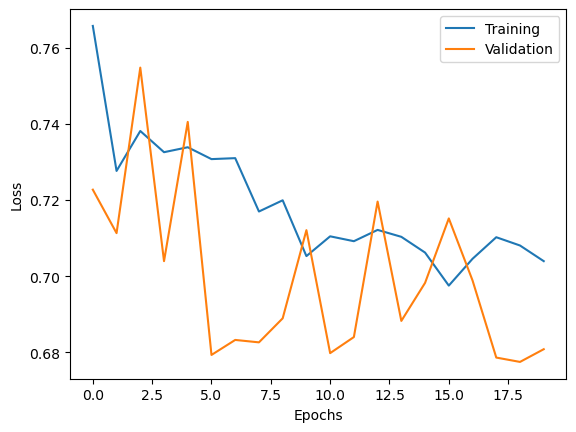

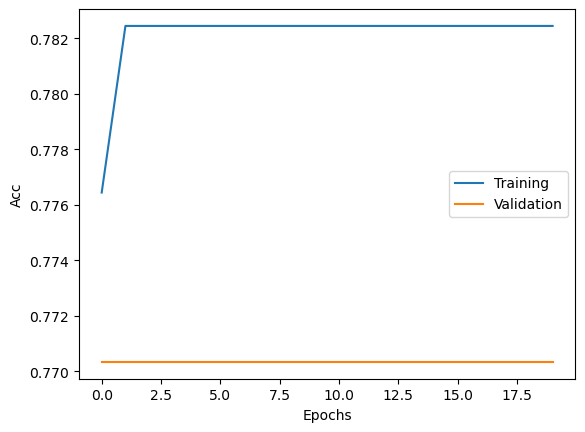

In [64]:
from sklearn.utils import class_weight
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(train_X.shape[1], 1)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(64, 3, activation='relu'))
model.add(Conv1D(64, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

history = model.fit(train_X, train_y, epochs=20, batch_size=10, 
                    validation_data=(test_X, test_y))
plot_history(history)

In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 510, 64)           256       
                                                                 
 conv1d_9 (Conv1D)           (None, 508, 64)           12352     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 169, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_10 (Conv1D)          (None, 167, 64)           12352     
                                                                 
 conv1d_11 (Conv1D)          (None, 165, 64)           12352     
                                                                 
 global_average_pooling1d_2  (None, 64)                0         
  (GlobalAveragePooling1D)                            

From above, the deep learning model overfit this can be due to more samples being from the 'high' category. 
The model can be optimized by averaging the samples to make sure that the dataset does not contain most data from one label alone. 
